In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/data_task3.csv', delimiter=r"\s+")

In [3]:
def confusion_metrics(df):
    df['TP'] = ((df['jud'] == 1) & (df['cjud'] == 1)).astype('int')
    df['TN'] = ((df['jud'] == 0) & (df['cjud'] == 0)).astype('int')
    df['FP'] = ((df['jud'] == 1) & (df['cjud'] == 0)).astype('int')
    df['FN'] = ((df['jud'] == 0) & (df['cjud'] == 1)).astype('int')
    df['accuracy'] = (df.TP + df.TN)/(df.TP + df.FP + df.TN + df.FN)
    return df

In [4]:
def accuracy_rate(df):
    df = df.groupby('uid')['accuracy'].agg(['sum','count'])
    df['accuracy_rate'] = df['sum'] / df['count']
    df = df.sort_values(['accuracy_rate'], ascending = True)
    return df

In [5]:
%%time
data = confusion_metrics(data)

CPU times: user 25.2 ms, sys: 8.2 ms, total: 33.4 ms
Wall time: 32.6 ms


In [6]:
%%time
data = accuracy_rate(data)

CPU times: user 137 ms, sys: 39.5 ms, total: 176 ms
Wall time: 48.1 ms


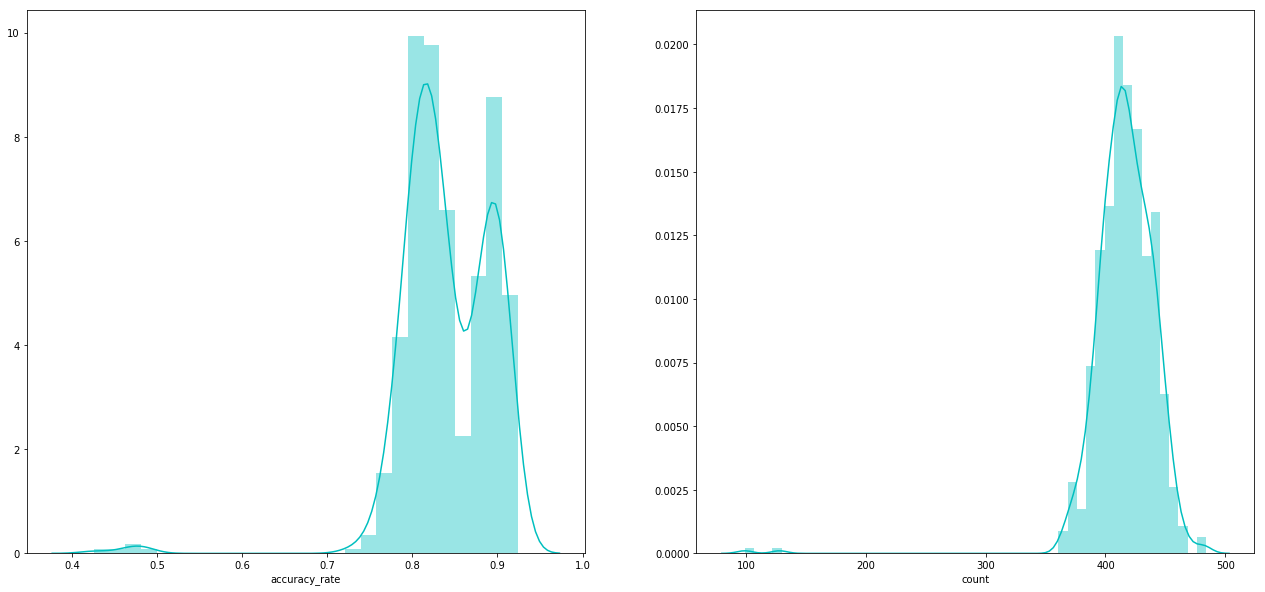

In [100]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,10))
sns.distplot(data.accuracy_rate, color = 'c', ax=axes[0])
sns.distplot(data['count'], color = 'c', ax=axes[1])

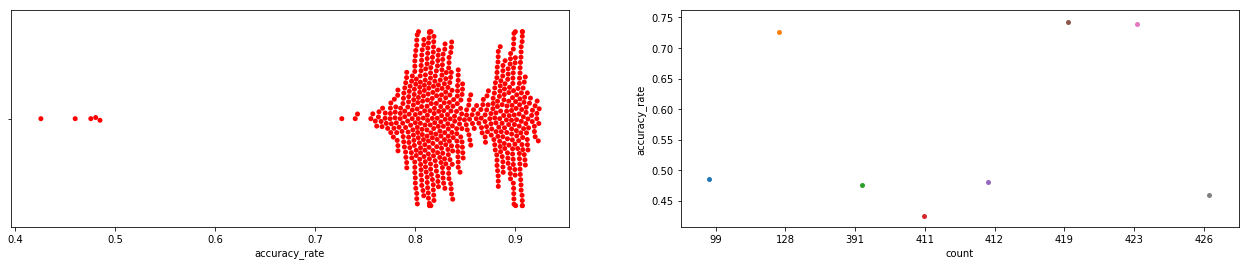

In [96]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,4))
sns.swarmplot(x='accuracy_rate', data=data, palette=['r'], ax=axes[0])
sns.stripplot(x='count', y='accuracy_rate', data=data[(data.accuracy_rate <0.75)], ax=axes[1])

In [10]:
data[(data.accuracy_rate <=0.7)]

,sum,count,accuracy_rate
uid,,,
56,175.0,411,0.425791
3,196.0,426,0.460094
118,186.0,391,0.475703
390,198.0,412,0.480583
234,48.0,99,0.484848
